# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `dataproject.py` file includes a function which will be used multiple times in this notebook.

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2 # install with pip install matplotlib-venn
import pandas_datareader # install with `pip install pandas-datareader`
import pydst # install with `pip install git+https://github.com/elben10/pydst`
import datetime
import math

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

In [244]:
# a. load

#Setting times:
start = datetime.datetime(1950,1,1)
end = datetime.datetime(2020,3,27)

#Loading data for stock index, two interest rates for rate spread:
stocks = pandas_datareader.data.DataReader('WILL5000PRFC','fred',start,end)
dgs1 = pandas_datareader.data.DataReader('dgs1','fred',start,end)
dgs10 = pandas_datareader.data.DataReader('dgs10','fred',start,end)

#Renaming stocks-column for easier retreival:
stocks.rename(columns={'WILL5000PRFC':'stocks'},inplace=True)

#Merging data into single dataframe:
mellemregning = pd.merge(stocks,dgs1,how='inner',left_index=True,right_index=True)
data = pd.merge(mellemregning,dgs10,how='inner',left_index=True,right_index=True)

#Deleting NaN:
data.dropna(inplace=True)

#Defining spread:
data['spread'] = data['dgs10']-data['dgs1']
data['logstocks'] = [
    math.log(i)
    for i in data['stocks']
]

data


,stocks,dgs1,dgs10,spread,logstocks
DATE,,,,,
1970-12-31,830.27,4.94,6.50,1.56,6.721751
1971-01-29,873.31,4.23,6.09,1.86,6.772291
1971-02-26,885.37,3.69,6.14,2.45,6.786006
1971-03-31,923.13,3.92,5.53,1.61,6.827770
1971-04-30,955.25,4.77,6.08,1.31,6.861973
...,...,...,...,...,...
2020-03-20,23082.46,0.15,0.92,0.77,10.046828
2020-03-23,22463.62,0.17,0.76,0.59,10.019652
2020-03-24,24542.52,0.25,0.84,0.59,10.108162


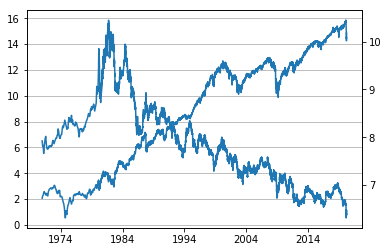

In [245]:
#Plotting:
fig, ax1 = plt.subplots()


ax1.plot(data['dgs10'])
ax1.grid(axis='y')

ax2 = ax1.twinx()
ax2.plot(data['logstocks'])


In [246]:
#OLS med Pythonpakke:
import statsmodels.api as sm

X = sm.add_constant(data['dgs10'])
model = sm.OLS(data['logstocks'],X)
results = model.fit()
results.params
print(results.summary())
print(np.std(data['logstocks']))

OLS Regression Results                            
Dep. Variable:              logstocks   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 5.610e+04
Date:                Sun, 29 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:02:53   Log-Likelihood:                -4470.2
No. Observations:               10176   AIC:                             8944.
Df Residuals:                   10174   BIC:                             8959.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4443      0.008   1350.179      0.000      10.429      10.460
d